In [124]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import os
from sklearn.tree import export_graphviz
import graphviz
import xgboost as xgb
from sklearn.datasets import make_blobs
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

## Generated dataset

In [125]:
X, y = make_blobs(n_samples=2000, n_features=3, random_state=42)
print(X.shape)
y

(2000, 3)


array([2, 2, 1, ..., 1, 1, 0])

## Exploring and Analyzing Data

In [126]:
X_df = pd.DataFrame(X, columns=["X1", "X2", "X3"])
y_df = pd.DataFrame(y, columns=["Y1"])
print(y_df)
X_df

      Y1
0      2
1      2
2      1
3      1
4      1
...   ..
1995   2
1996   2
1997   1
1998   1
1999   0

[2000 rows x 1 columns]


,X1,X2,X3
0,-8.499150,5.667142,1.509983
1,-9.736497,7.584346,1.997468
2,0.773310,-7.171882,-6.727008
3,1.745282,-5.885697,-7.788316
4,1.583768,-5.288722,-7.983133
...,...,...,...
1995,-7.004843,6.572623,-0.021636
1996,-10.213553,7.144539,1.863649
1997,0.055070,-7.029731,-5.528081
1998,3.402287,-7.494578,-6.555095


In [127]:
print(y_df.isna().sum())
X_df.isna().sum()

Y1    0
dtype: int64


X1    0
X2    0
X3    0
dtype: int64

In [128]:
print(X_df.info())
X_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      2000 non-null   float64
 1   X2      2000 non-null   float64
 2   X3      2000 non-null   float64
dtypes: float64(3)
memory usage: 47.0 KB
None


,X1,X2,X3
count,2000.000000,2000.000000,2000.000000
mean,-3.185601,3.158252,-0.058714
std,4.552214,7.209014,5.037935
min,-12.420390,-10.351057,-9.712629
25%,-8.239049,-6.206542,-6.163356
50%,-2.522167,7.251697,1.965763
75%,1.275338,8.652427,4.039708
max,4.543077,11.952039,8.012175


In [129]:
data = pd.concat([X_df, y_df], axis=1)
data

,X1,X2,X3,Y1
0,-8.499150,5.667142,1.509983,2
1,-9.736497,7.584346,1.997468,2
2,0.773310,-7.171882,-6.727008,1
3,1.745282,-5.885697,-7.788316,1
4,1.583768,-5.288722,-7.983133,1
...,...,...,...,...
1995,-7.004843,6.572623,-0.021636,2
1996,-10.213553,7.144539,1.863649,2
1997,0.055070,-7.029731,-5.528081,1
1998,3.402287,-7.494578,-6.555095,1


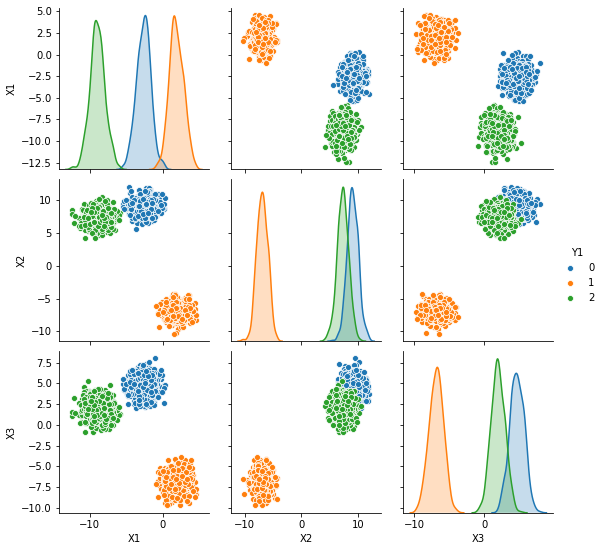

In [130]:
sns.pairplot(data, hue="Y1")

In [131]:
data.groupby(by="Y1").count()

,X1,X2,X3
Y1,,,
0,667,667,667
1,667,667,667
2,666,666,666


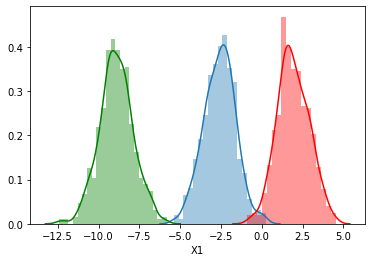

In [132]:
sns.distplot(data[data.Y1 == 0].X1)
sns.distplot(data[data.Y1 == 1].X1,color="r")
sns.distplot(data[data.Y1 == 2].X1,color="g")

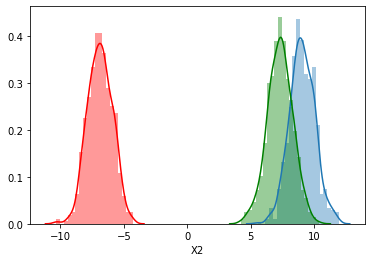

In [133]:
sns.distplot(data[data.Y1 == 0].X2)
sns.distplot(data[data.Y1 == 1].X2,color="r")
sns.distplot(data[data.Y1 == 2].X2,color="g")

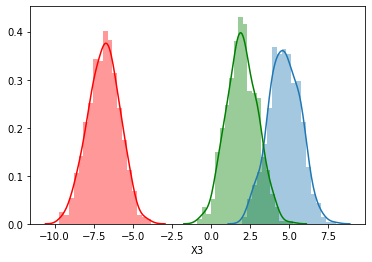

In [134]:
sns.distplot(data[data.Y1 == 0].X3)
sns.distplot(data[data.Y1 == 1].X3,color="r")
sns.distplot(data[data.Y1 == 2].X3,color="g")

## Train and Test Split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)
X_train

array([[-1.67784836,  8.8328078 ,  5.4119004 ],
       [ 2.30523493, -5.99844385, -7.26035115],
       [ 2.35198021, -6.50179797, -7.47318173],
       ...,
       [-9.91150627,  8.01015111,  1.87114795],
       [-3.76254582,  9.36293047,  3.22905434],
       [-9.29143535,  6.83013217,  2.89096328]])

## Defining Decision Tree

In [136]:
dc = DecisionTreeClassifier(max_depth=1, random_state=42)
dc.fit(X_train, y_train)
print("Accuracy of train:",dc.score(X_train,y_train))
print("Accuracy of test:",dc.score(X_test,y_test))

Accuracy of train: 0.6835820895522388
Accuracy of test: 0.6333333333333333


### If max_depth is greater than 1, whatevet the max_depth is, accuracy of test and train will be 1.0 so there might me overfitting

### If max_depth is 1, accuracy will be among 0.60-0.70 for test and train

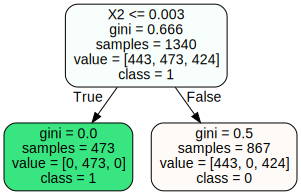

In [137]:
classes = ['0', '1', '2']
os.environ["PATH"] += ';' + r'C:\Users\beray\anaconda3\Library\bin\graphviz'

dot_data = export_graphviz(dc, out_file=None,
                     feature_names=X_df.columns,
                     class_names=classes,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

### So as we see in this graph, not all the samples have leaf nodes and accuracy has low value. So there might be underfitting problem

In [138]:
# Metrics
pred = dc.predict(X_test)
print("Precision = {}".format(precision_score(y_test, pred, average='weighted', labels=np.unique(pred))))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.7217077027332279
Recall = 0.6666666666666666
Accuracy = 0.6333333333333333
F1 Score = 0.5497584541062802


In [139]:
confusion_matrix(y_test, pred)

array([[224,   0,   0],
       [  0, 194,   0],
       [242,   0,   0]], dtype=int64)

### Let's look at max_depth >= 2

In [140]:
dc1 = DecisionTreeClassifier(max_depth=2, random_state=42)
dc1.fit(X_train, y_train)
print("Accuracy of train:",dc1.score(X_train,y_train))
print("Accuracy of test:",dc1.score(X_test,y_test))

Accuracy of train: 1.0
Accuracy of test: 1.0


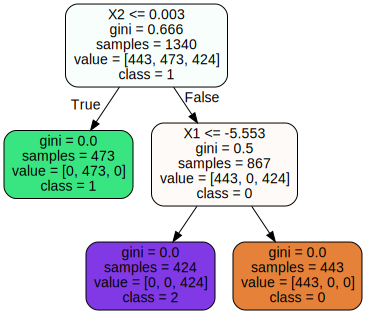

In [141]:
os.environ["PATH"] += ';' + r'C:\Users\beray\anaconda3\Library\bin\graphviz'

dot_data = export_graphviz(dc1, out_file=None,
                     feature_names=X_df.columns,
                     class_names=classes,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

### As we see all the samples have leaf node so all of them replaced. This means there is a overfitting problem

In [142]:
# Metrics
pred1 = dc1.predict(X_test)
print("Precision = {}".format(precision_score(y_test, pred1, average='weighted', labels=np.unique(pred))))
print("Recall = {}".format(recall_score(y_test, pred1, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred1)))
print("F1 Score = {}".format(f1_score(y_test, pred1,average='macro')))

Precision = 1.0
Recall = 1.0
Accuracy = 1.0
F1 Score = 1.0


In [143]:
confusion_matrix(y_test, pred1)

array([[224,   0,   0],
       [  0, 194,   0],
       [  0,   0, 242]], dtype=int64)

### Trying XGBoost Algorithm

In [144]:
train = xgb.DMatrix(X_train, y_train)
test = xgb.DMatrix(X_test, y_test)

In [145]:
par = {'max_depth':1, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}
num_round = 5
model = xgb.train(par, train, num_round)

[20:14:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [146]:
preds = model.predict(test)
preds[:10]

array([[0.00346166, 0.00133673, 0.9952016 ],
       [0.9504616 , 0.02476672, 0.02477161],
       [0.00496814, 0.99344337, 0.00158853],
       [0.00496814, 0.99344337, 0.00158853],
       [0.00175164, 0.00133903, 0.9969093 ],
       [0.00175164, 0.00133903, 0.9969093 ],
       [0.00346166, 0.00133673, 0.9952016 ],
       [0.00496814, 0.99344337, 0.00158853],
       [0.00496814, 0.99344337, 0.00158853],
       [0.00408344, 0.0013359 , 0.9945807 ]], dtype=float32)

In [147]:
best = [np.argmax(i) for i in preds]
best

[2,
 0,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 0,
 2,
 1,
 0,
 2,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 0,
 2,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 2,
 1,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 1,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 0,
 0,
 1,
 2,
 0,
 0,
 2,
 2,
 1,
 2,
 1,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 1,
 2,
 1,
 2,
 2,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 1,
 0,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 1,
 1,
 2,
 0,
 1,
 0,
 2,
 0,
 2,
 2,
 2,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 2,
 2,
 1,
 1,
 0,
 1,
 2,
 2,
 0,
 0,
 1,
 1,
 2,
 2,
 0,
 2,
 1,
 0,
 2,
 0,
 0,


In [148]:
print("Precision = {}".format(precision_score(y_test, best, average='macro')))
print("Recall = {}".format(recall_score(y_test, best, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best)))

Precision = 1.0
Recall = 1.0
Accuracy = 1.0


In [149]:
confusion_matrix(y_test, best)

array([[224,   0,   0],
       [  0, 194,   0],
       [  0,   0, 242]], dtype=int64)

### The same result as decision tree when max_depth is 1. So there is overfitting problem

In [150]:
par1 = {'max_depth':1, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}
num_round1 = 1
model1 = xgb.train(par, train, num_round1)

[20:14:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [151]:
preds1 = model1.predict(test)
preds1[:10]

array([[0.09647866, 0.08692173, 0.81659967],
       [0.35691446, 0.32155943, 0.3215261 ],
       [0.09641522, 0.8167291 , 0.08685558],
       [0.09641522, 0.8167291 , 0.08685558],
       [0.09647866, 0.08692173, 0.81659967],
       [0.09647866, 0.08692173, 0.81659967],
       [0.09647866, 0.08692173, 0.81659967],
       [0.09641522, 0.8167291 , 0.08685558],
       [0.09641522, 0.8167291 , 0.08685558],
       [0.09647866, 0.08692173, 0.81659967]], dtype=float32)

In [152]:
best1 = [np.argmax(i) for i in preds1]
best1

[2,
 0,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 0,
 2,
 1,
 0,
 2,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 0,
 2,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 2,
 1,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 1,
 0,
 1,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 0,
 0,
 1,
 2,
 0,
 0,
 2,
 2,
 1,
 2,
 1,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 1,
 2,
 1,
 2,
 2,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 1,
 0,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 1,
 1,
 2,
 0,
 1,
 0,
 2,
 0,
 2,
 2,
 2,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 2,
 2,
 1,
 1,
 0,
 1,
 2,
 2,
 0,
 0,
 1,
 1,
 2,
 2,
 0,
 2,
 1,
 0,
 2,
 0,
 0,


In [153]:
print("Precision = {}".format(precision_score(y_test, best1, average='macro')))
print("Recall = {}".format(recall_score(y_test, best1, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best1)))

Precision = 1.0
Recall = 1.0
Accuracy = 1.0


### When we decrease num_round, the result does not change